# Index Delete Performance Comparison Report Between Two Designs

## Test Description

### Test Purpose

This test try to find out the performance difference between the old index delete design and the new design.

### Test Environment

db2.testy013.cloudant.com

### Test Scenario

** Since search index and geo index have almost the same depth of dictionary as view index, the test only focus on view index. And the test result should be the same for search and geo index. ** 

There are about 26K users and about 300K dbs on moonshine. The more users on a cluster, the longer it takes to traverse all dirs to find out all deleted files.   
This test tried to similate the scenario on moonshine. According to the disscussion with PengHui, I use scripts to generate user directorys since we can not create so many real users on testy013. The dirs generated by scripts is the same as those generated by real users. Each user have 10 dbs and each db contains 1 view index.  
** For example:  **  
There are 10 dbs under testy013-user1 and each db has a view index. The view index for db86318-1 has been deleted. All users generated by scripts will contain same dirs and files. The users could be testy013-user1_1, testy013-user1_2, ..., testy013-user1_5000 if generating 5000 users. 


    |-- db86318-10.1502949028_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-1.20170819.020333.deleted.1502949239_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-2.1502943194_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-3.1502944333_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-4.1502945479_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-5.1502946620_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-6.1502947809_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-7.1502948904_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-8.1502946798_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  
    |-- db86318-9.1502947930_design  
    |   `-- 5d6056c82c34d8c2e751fc7ac27c2115.view  


** When testing the old index delete design, dirs could be: **

 /srv/view_index/.shards/60000000-7fffffff/testy013-user1_9900/db86318-1.20170819.020333.deleted.1502949239_design

** When testing the new index delete design, dirs could be: **

/srv/view_index/.recovery/60000000-7fffffff/testy013-user1_9900/db86318-1.20170819.020333.deleted.1502949239_design

** Test Steps: **

(1)generate [2k, 3k, 4k, 5k, 10K] users with data by scripts  
(2)run "time (remove-couch-files-deleted-before --hours=1 --type=view --action=unlink --dry-run /srv/view_index/.recovery)" for new design test cases 10 times  
or  
run "time (remove-couch-files-deleted-before --hours=1 --type=view --action=unlink --dry-run /srv/view_index/.delete)" for old design test cases 10 times  
(3)Compare the performance difference  

** Test Logs: All test logs are under db2.testy013.cloudant.com:/srv/db/tmp_log ** 





### Test TimeLine

    create 2000 users 2017-08-21:10:40....  
    create 2000 users finished 2017-08-21:10:47!  
    run 10 times 2000 old 2017-08-21:10:52....   
    run 10 times 2000 old finished 2017-08-21:10:53  
    create .recovery for 2000 users 2017-08-21:10:58....  
    create .recovery for 2000 users finished 2017-08-21:11:04  
    run 10 times 2000 new 2017-08-21:11:09....  
    run 10 times 2000 new finished 2017-08-21:11:10  
    clean env start for 2000 users 2017-08-21:11:15....  
    clean env finished for 2000 users 2017-08-21:11:17  
    create 3000 users 2017-08-21:11:27....  
    create 3000 users finished 2017-08-21:11:38!  
    run 10 times 3000 old 2017-08-21:11:43....  
    run 10 times 3000 old finished 2017-08-21:11:44  
    create .recovery for 3000 users 2017-08-21:11:49....  
    create .recovery for 3000 users finished 2017-08-21:11:59  
    run 10 times 3000 new 2017-08-21:12:04....  
    run 10 times 3000 new finished 2017-08-21:12:04  
    clean env start for 3000 users 2017-08-21:12:09....  
    clean env finished for 3000 users 2017-08-21:12:13  
    create 4000 users 2017-08-21:12:23....  
    create 4000 users finished 2017-08-21:12:37!  
    run 10 times 4000 old 2017-08-21:12:42....  
    run 10 times 4000 old finished 2017-08-21:12:44  
    create .recovery for 4000 users 2017-08-21:12:49....  
    create .recovery for 4000 users finished 2017-08-21:13:02  
    run 10 times 4000 new 2017-08-21:13:07....  
    run 10 times 4000 new finished 2017-08-21:13:08  
    clean env start for 4000 users 2017-08-21:13:13....  
    clean env finished for 4000 users 2017-08-21:13:18  
    create 5000 users 2017-08-21:13:28....  
    create 5000 users finished 2017-08-21:13:45!  
    run 10 times 5000 old 2017-08-21:13:50....  
    run 10 times 5000 old finished 2017-08-21:13:53  
    create .recovery for 5000 users 2017-08-21:13:58....  
    create .recovery for 5000 users finished 2017-08-21:14:14  
    run 10 times 5000 new 2017-08-21:14:19....  
    run 10 times 5000 new finished 2017-08-21:14:20  
    clean env start for 5000 users 2017-08-21:14:25....  
    clean env finished for 5000 users 2017-08-21:14:32  
    create 10000 users 3183--14::....  
    create 10000 users finished 2017-08-21:15:16!  
    run 10 times 10000 old 2017-08-21:15:21....   
    run 10 times 10000 old finished 2017-08-21:15:26  
    create .recovery for 10000 users 2017-08-21:15:31....  
    create .recovery for 10000 users finished 2017-08-21:16:07  
    run 10 times 10000 new 2017-08-21:16:12....  
    run 10 times 10000 new finished 2017-08-21:16:13  
    clean env start for 10000 users 2017-08-21:16:18....  
    clean env finished for 10000 users 2017-08-21:16:32  

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image
from plot import maybe_num,logs_to_df,render_line_charts,get_mean_df

## Execution Time Details Of Each Case

### Execution Time Details Of Each Case

In [2]:
rootdir = "test-log-aggregate"
df = logs_to_df(rootdir)
df

,number,real,user,sys,case
0,1.0,7.525,3.648,3.708,test_view_index_new_10k
1,2.0,6.232,3.628,2.568,test_view_index_new_10k
2,3.0,6.398,3.740,2.616,test_view_index_new_10k
3,4.0,6.299,3.784,2.484,test_view_index_new_10k
4,5.0,6.498,3.656,2.800,test_view_index_new_10k
5,6.0,6.439,3.752,2.648,test_view_index_new_10k
6,7.0,6.328,3.752,2.544,test_view_index_new_10k
7,8.0,6.283,3.692,2.556,test_view_index_new_10k
8,9.0,6.329,3.672,2.616,test_view_index_new_10k
9,10.0,6.323,3.808,2.468,test_view_index_new_10k


### Execution Time Details Of Each Case Comparison Chart

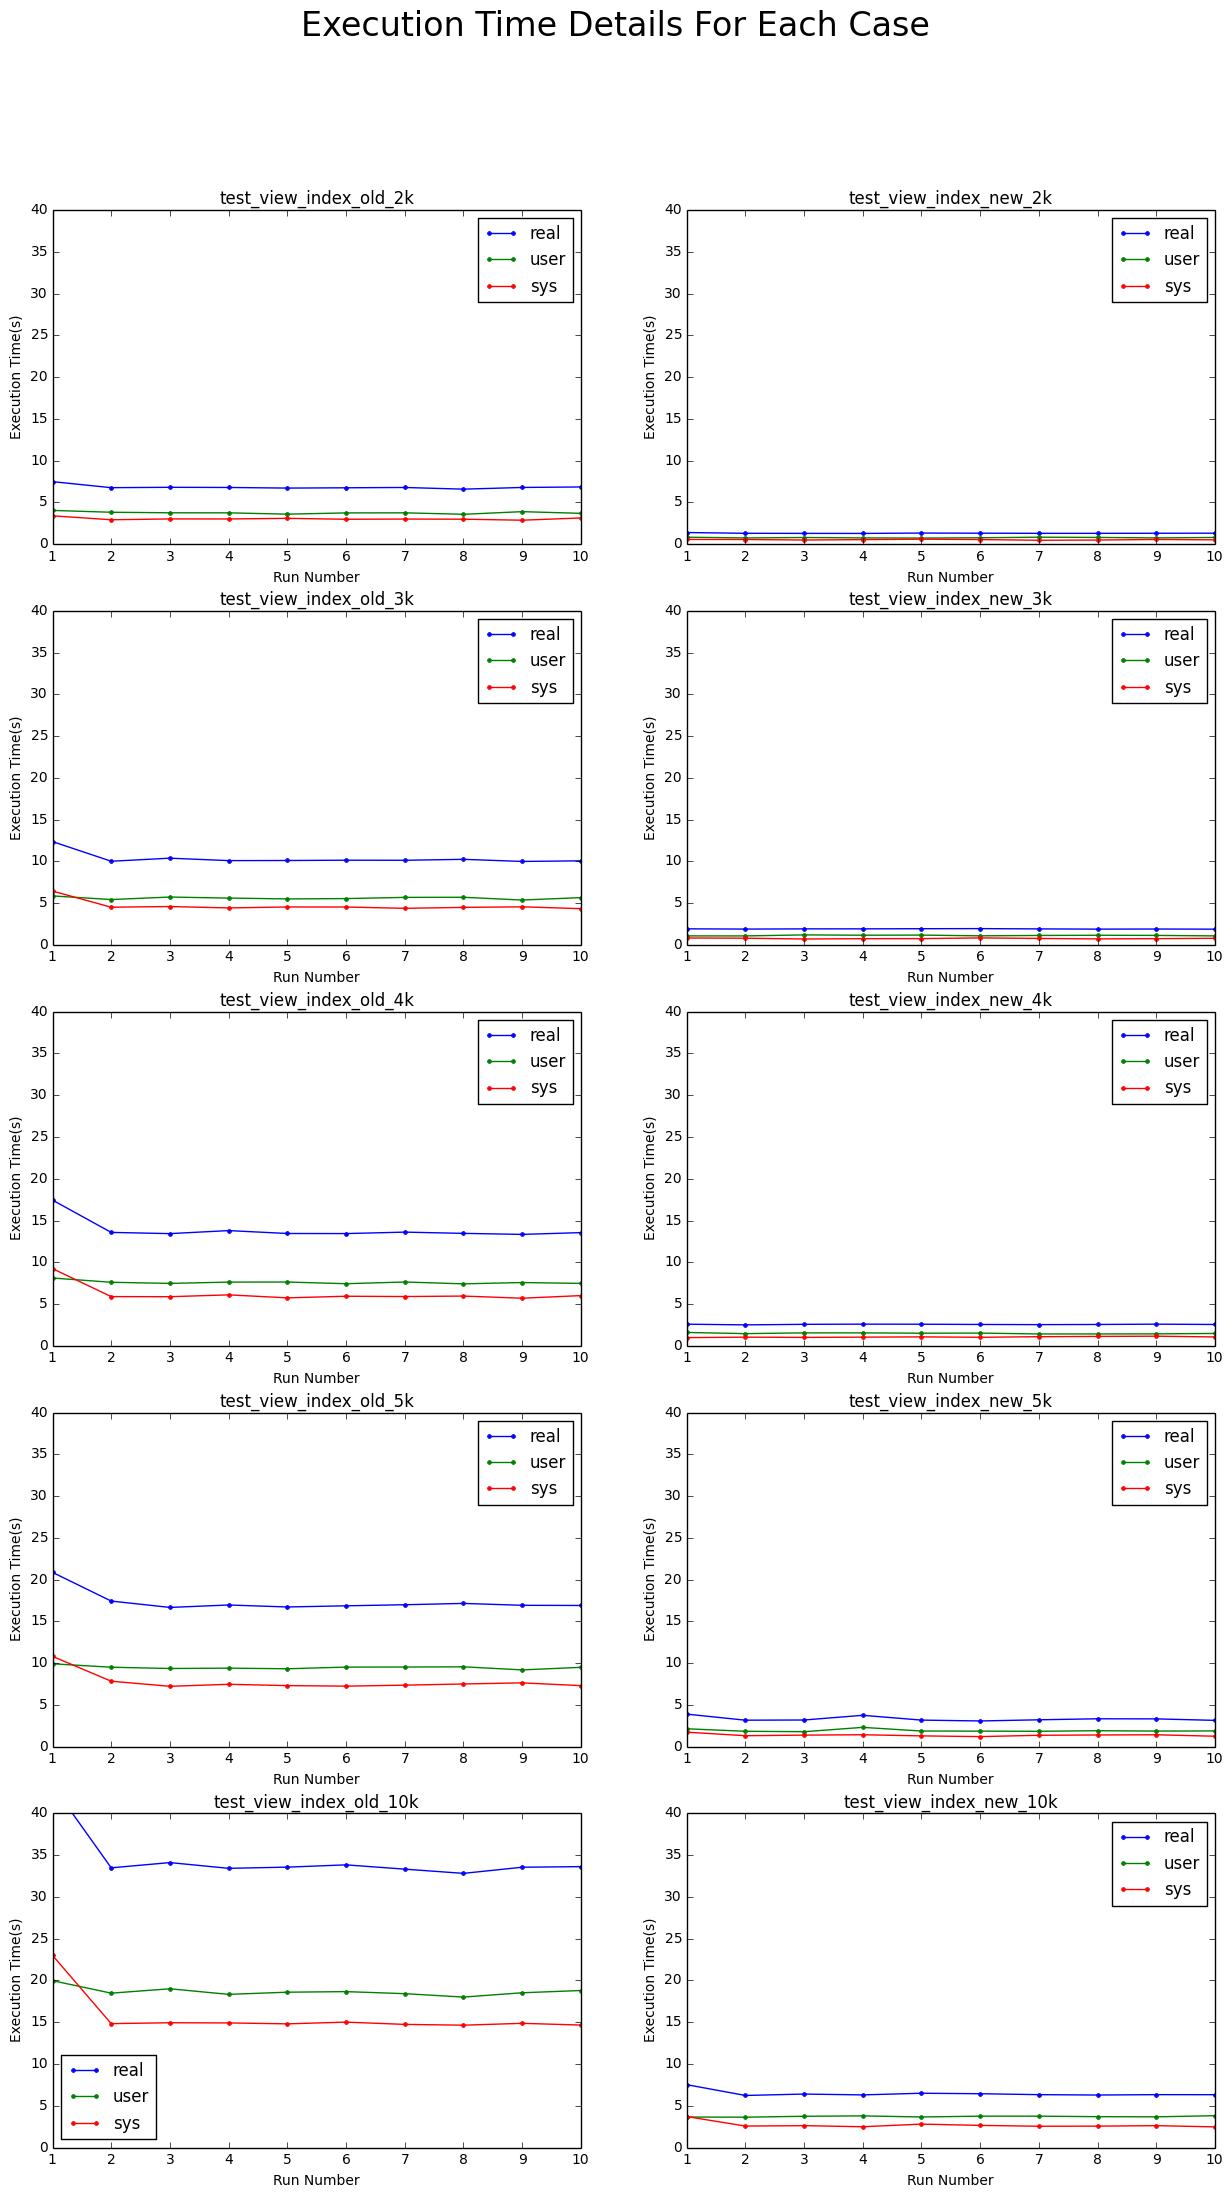

In [3]:
df_with_group = df.groupby(["case"])
render_line_charts(df_with_group, figsize=(15, 25), cols=["real","user","sys"], title="Execution Time Details For Each Case")

## Mean Execution Time Comparison

### Mean Execution Time of Each Case

In [4]:
df_mean = get_mean_df(df_with_group)
df_mean

,real_mean,user_mean,sys_mean,case
0,6.8192,3.7484,3.0292,test_view_index_old_2k
1,1.2992,0.7680,0.5216,test_view_index_new_2k
2,10.3568,5.6128,4.6840,test_view_index_old_3k
3,1.9152,1.1288,0.7720,test_view_index_new_3k
4,13.9075,7.5965,6.2321,test_view_index_old_4k
5,2.5600,1.4900,1.0536,test_view_index_new_4k
6,17.3481,9.4810,7.7689,test_view_index_old_5k
7,3.3274,1.9288,1.3760,test_view_index_new_5k
8,34.5155,18.6822,15.6426,test_view_index_old_10k
9,6.4654,3.7132,2.7008,test_view_index_new_10k


### Mean Execution Time Comparison Chart

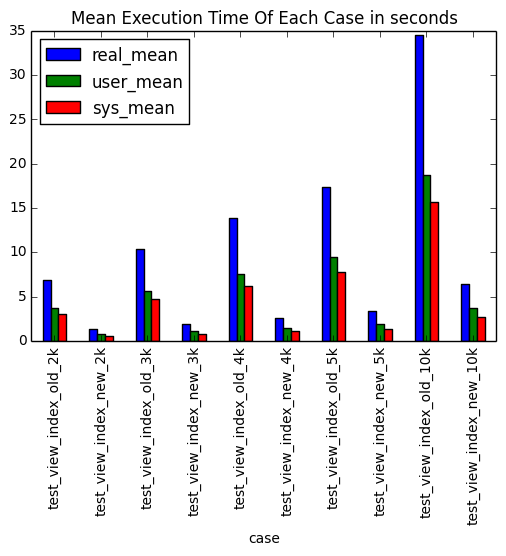

In [5]:
df_mean_case = df_mean.set_index('case')
df_mean_case.plot(kind='bar', title='Mean Execution Time Of Each Case in seconds')

## System Resource Usage

From the test timeline section, we can see the test cases run from 2017-08-21:10:40 to 2017-08-21:16:32. So the following graphs are the system resource usage of whole timeline when all test cases running one by one.

### CPU Usage

CPU usage looks well when run test cases

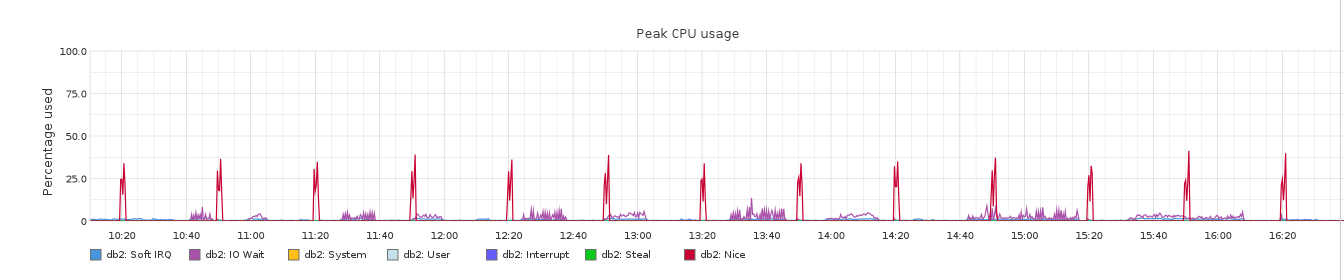

In [6]:
Image(filename='resource_usage/peakCPU.png')

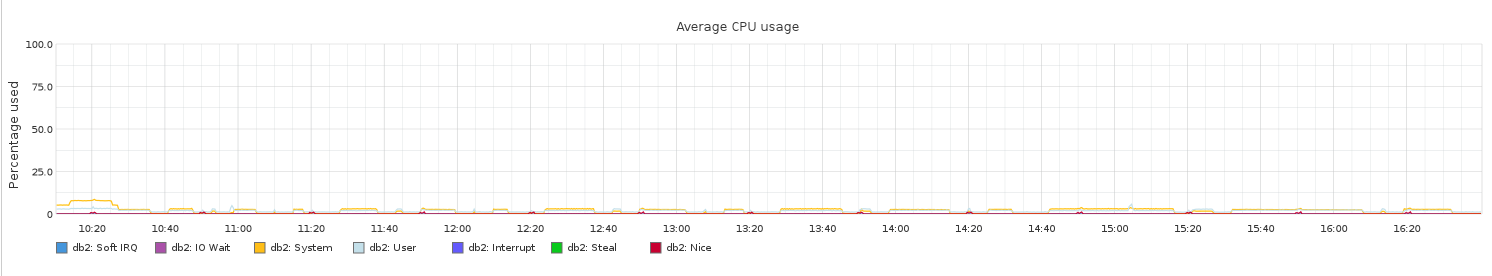

In [7]:
Image(filename='resource_usage/avgCPU.png')

### Disk Related Metrics

Disk usage also looks well when run test cases. The much higher write spike is generating users. Add some label on **disk operations** graph which can help to distingush the timeline

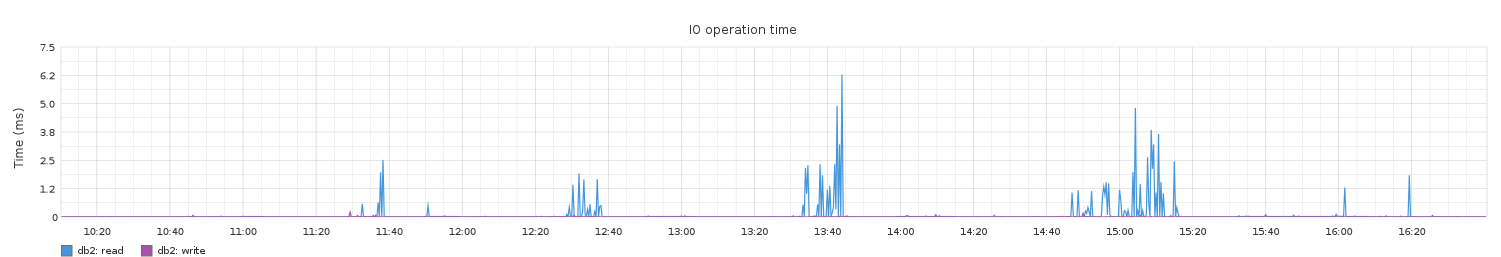

In [8]:
Image(filename='resource_usage/io_ops_time.png')

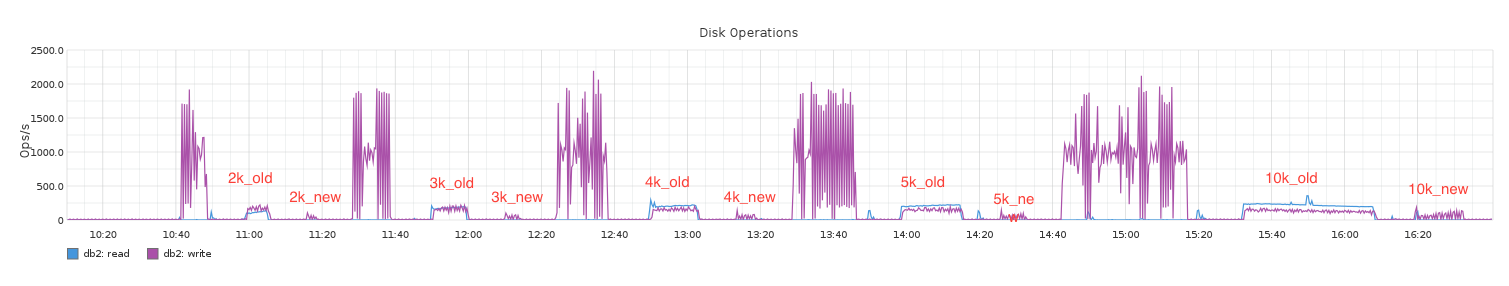

In [9]:
Image(filename='resource_usage/disk_ops.png')

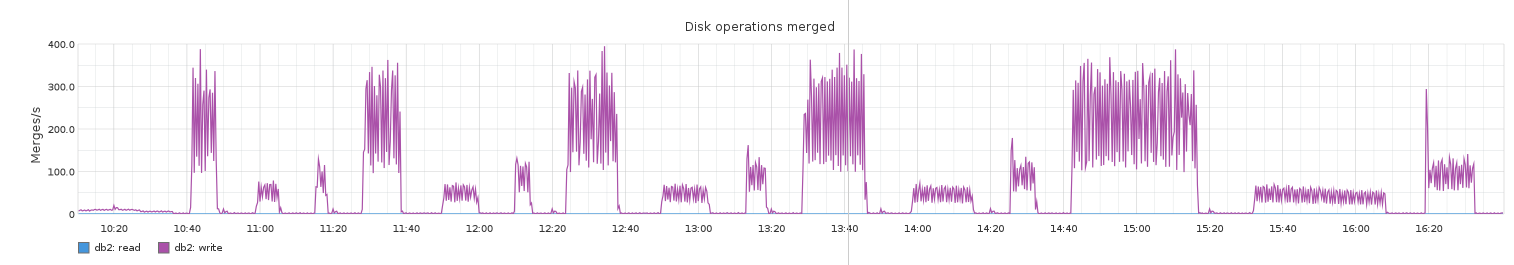

In [10]:
Image(filename='resource_usage/disk_ops_merge.png')

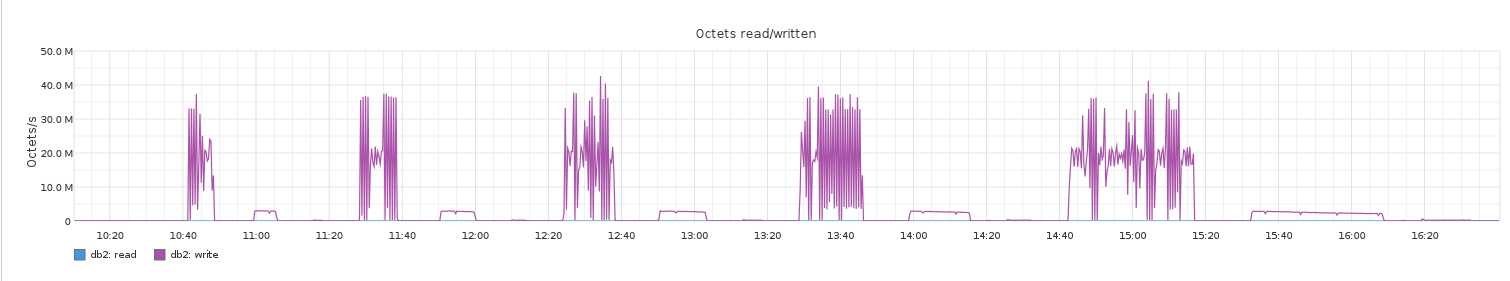

In [11]:
Image(filename='resource_usage/octet.png')

### Memory Usage

Memory usage in very low value when run test cases

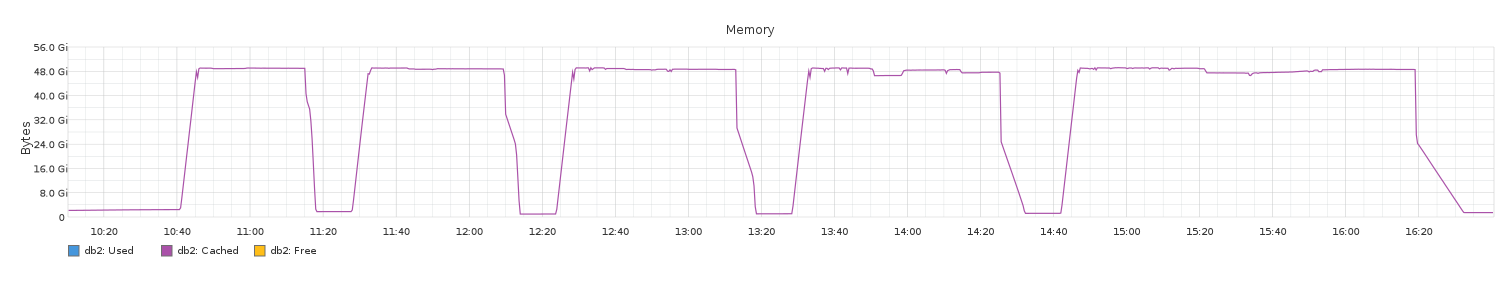

In [12]:
Image(filename='resource_usage/memory.png')

## Conclusion

** We can find the following conclusion from the test result: **    
(1) The more dirs on the node, the more performance improvement of new design compared with old design;   
(2) For the 10K users case, new design is almost 6 times faster than old design;    
(3) There are 26K users on moonshine, the performance improvement of new design should be more significant;  
(4) No significant more resources needed for the new design;  
(5) Search index and geo index should have the same conclusion.